<a href="https://colab.research.google.com/github/Qasaiemh/Quality_Supply_Chain_Assignment/blob/Q.1.4/Q_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Question – 1 4.Visualize how height and weight measurements are varying between lots. Also, how can
# we see the defect count by lot and product family?

In [2]:
import pandas as pd
import sqlite3

# Step 1: Load each sheet of the Excel file into separate Pandas DataFrames
excel_file_path = '/content/question_1_2.xlsx'
all_tables_data = pd.read_excel(excel_file_path, sheet_name=None)

# Step 2: Connect to an SQLite database
db_path = 'supply_chain_database.db'
conn = sqlite3.connect(db_path)

# Step 3: Write each DataFrame to a separate table in the SQLite database
for sheet_name, df in all_tables_data.items():
    table_name = sheet_name.replace(" ", "_")  # Replace any spaces in sheet names with underscores
    df.to_sql(table_name, conn, if_exists='replace', index=False)

# Close the connection to the database
conn.close()


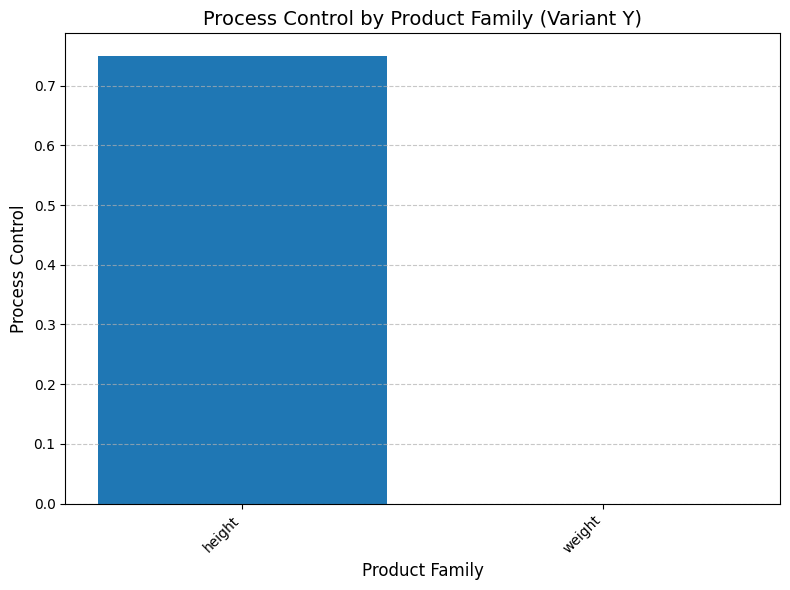

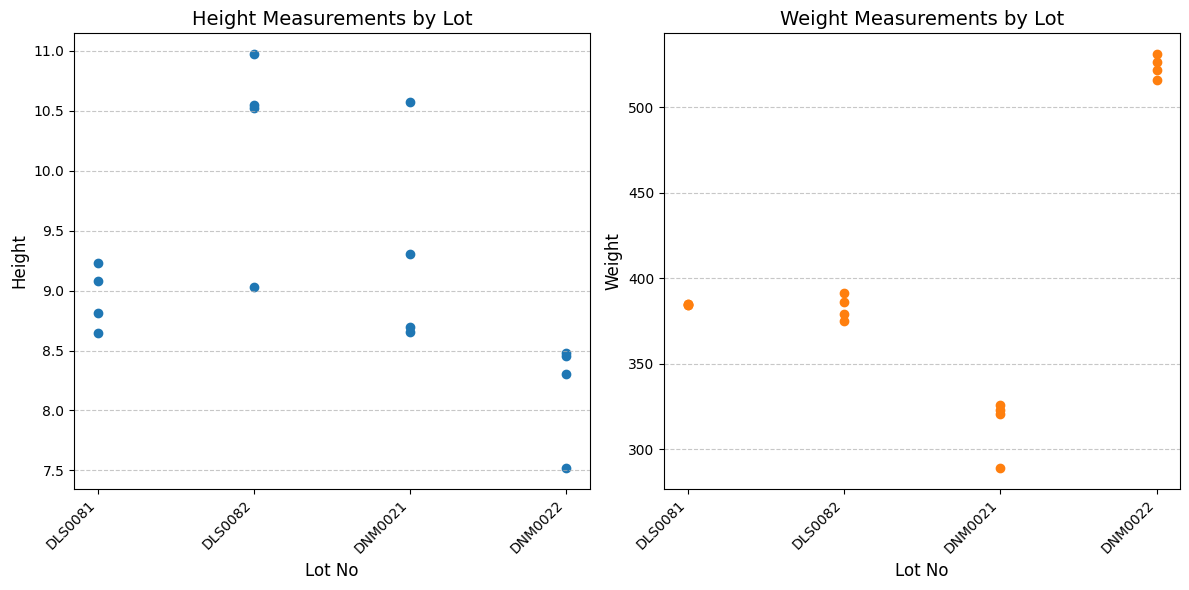

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Step 2: Query data from the "Specifications", "Production_Sequence", and "Measurements" tables
query_specifications = "SELECT * FROM Specifications"
query_production_sequence = "SELECT * FROM Production_Sequence"
query_measurements = "SELECT * FROM Measurements"

df_specifications = pd.read_sql_query(query_specifications, conn)
df_production_sequence = pd.read_sql_query(query_production_sequence, conn)
df_measurements = pd.read_sql_query(query_measurements, conn)

# Step 3: Close the connection to the database
conn.close()

# Merge the "Measurements" and "Specifications" tables on "Product Code"
merged_df = df_measurements.merge(df_specifications, on='Product Code', how='inner')

# Calculate the process control for each product family for variant Y
def calculate_process_control(group):
    return ((group['T_Height'] >= group['LSL']) & (group['T_Height'] <= group['USL'])).mean()

# Add the 'Product Family' column based on the 'T_Name' column
merged_df['Product Family'] = merged_df['T_Name'].str.split('_', expand=True)[1]

# Calculate the process control for each product family for variant Y
process_control_by_family = merged_df.groupby('Product Family').apply(calculate_process_control).reset_index()
process_control_by_family.columns = ['Product Family', 'Process Control']

# Sort the product families based on the process control in descending order
process_control_by_family = process_control_by_family.sort_values(by='Process Control', ascending=False)

# Plot the process control for each product family using a bar chart
plt.figure(figsize=(8, 6))
plt.bar(process_control_by_family['Product Family'], process_control_by_family['Process Control'], color='tab:blue')
plt.xlabel('Product Family', fontsize=12)
plt.ylabel('Process Control', fontsize=12)
plt.title('Process Control by Product Family (Variant Y)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Visualize how height and weight measurements vary between lots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_measurements['Lot No'], df_measurements['T_Height'], color='tab:blue')
plt.xlabel('Lot No', fontsize=12)
plt.ylabel('Height', fontsize=12)
plt.title('Height Measurements by Lot', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.scatter(df_measurements['Lot No'], df_measurements['T_Weight'], color='tab:orange')
plt.xlabel('Lot No', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.title('Weight Measurements by Lot', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
